In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
# 훈련 및 테스트 데이터 세트 결합
train_test_data = [train, test]

In [5]:
# Name값에서 성별 정보 추출
# 정규표현식으로 [문자]. 으로 끝나는 문자열 추출
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

In [6]:

# Name값에서 추출한 성별정보의 갯수 확인
# train data set
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [7]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [8]:
title_mapping = {
      'Mr' : 0
    , 'Miss' : 1
    , 'Mrs' : 2
    , 'Master' : 4
    , 'Dr' : 3
    , 'Rev' : 3
    , 'Mlle' : 3
    , 'Major' : 3
    , 'Col' : 3
    , 'Countess' : 3
    , 'Capt' : 3
    , 'Ms' : 3
    , 'Sir' : 3
    , 'Lady' : 3
    , 'Mme' : 3
    , 'Don' : 3
    , 'Jonkheer' : 3
}
train['Title'] = train['Title'].map(title_mapping)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [9]:
title_mapping = {
    'Mr' : 0 , 'Mrs' : 1, 'Miss' : 2, 'Master' : 4, 'Ms' : 3, 'Col' : 3, 'Rev' : 3, 'Dr' : 3, 'Dona' : 3
}
test['Title']= test['Title'].map(title_mapping)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [10]:
# 데이터 셋에서 불필요한 feature 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

---
### 성별
---

In [11]:
# 성별에 숫자 매핑
sex_mapping = {'male': 0, 'female':1}

In [12]:
# 반복문으로 매핑결과 데이터에 적용
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [14]:
train.sort_values(by='Ticket')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
504,505,1,1,1,16.0,0,0,110152,86.500,B79,S,1
257,258,1,1,1,30.0,0,0,110152,86.500,B77,S,1
759,760,1,1,1,33.0,0,0,110152,86.500,B77,S,3
262,263,0,1,0,52.0,1,1,110413,79.650,E67,S,0
558,559,1,1,1,39.0,1,1,110413,79.650,E67,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,0,3,1,NaN,0,0,W./C. 6609,7.550,NaN,S,1
92,93,0,1,0,46.0,1,0,W.E.P. 5734,61.175,E31,S,0
219,220,0,2,0,30.0,0,0,W/C 14208,10.500,NaN,S,0
540,541,1,1,1,36.0,0,2,WE/P 5735,71.000,B22,S,1


In [15]:
ticket_unique = train['Ticket'].unique()

In [16]:
# for ticket in train['Ticket'].unique():
#     train.loc[train['Ticket']==ticket,'group_size'] = len(train[train['Ticket']==ticket])

# for ticket in test['Ticket'].unique():
#     test.loc[test['Ticket']==ticket,'group_size'] = len(test[test['Ticket']==ticket])

In [17]:
# train['Fare'] = train['Fare'] / train['group_size']

In [18]:
# train data set
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

# test data set
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [19]:
train_test_data = [train,test]
for train_cp in train_test_data:
    train_cp.loc[train_cp['Age'] <= 16,'Age'] = 0
    train_cp.loc[(train_cp['Age'] > 16) & (train_cp['Age'] <= 26 ),'Age'] = 1
    train_cp.loc[(train_cp['Age'] > 26) & (train_cp['Age'] <= 36 ),'Age'] = 2
    train_cp.loc[(train_cp['Age'] > 36) & (train_cp['Age'] <= 62 ),'Age'] = 3
    train_cp.loc[train_cp['Age'] > 62,'Age'] = 4

train['Age'].value_counts(), test['Age'].value_counts()

(Age
 2.0    336
 1.0    255
 3.0    181
 0.0    104
 4.0     15
 Name: count, dtype: int64,
 Age
 2.0    139
 1.0    134
 3.0    100
 0.0     38
 4.0      7
 Name: count, dtype: int64)

In [20]:
# 나이대별 생사여부 확인
survived = train[train['Survived']==1]['Age'].value_counts()
dead = train[train['Survived']==0]['Age'].value_counts()

In [21]:
# 좌석별 승선 항구 확인하기
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

In [22]:
# DataFrame으로 만들어 인덱스 주기 
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

In [23]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [24]:
# 머신러닝 Classifier를 위해 텍스트 숫자 변경(매핑)
embarked_mapping = {'S':0, 'C':1, 'Q':2}

# map 함수 사용해서 처리
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [25]:
# 탑승권 가격이 결측값일 경우, 좌석 등급별 중간값으로 대치
# train data set
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)

# test data set
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

/Users/jeonchan/miniforge3/envs/titanic_dev/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/jeonchan/miniforge3/envs/titanic_dev/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


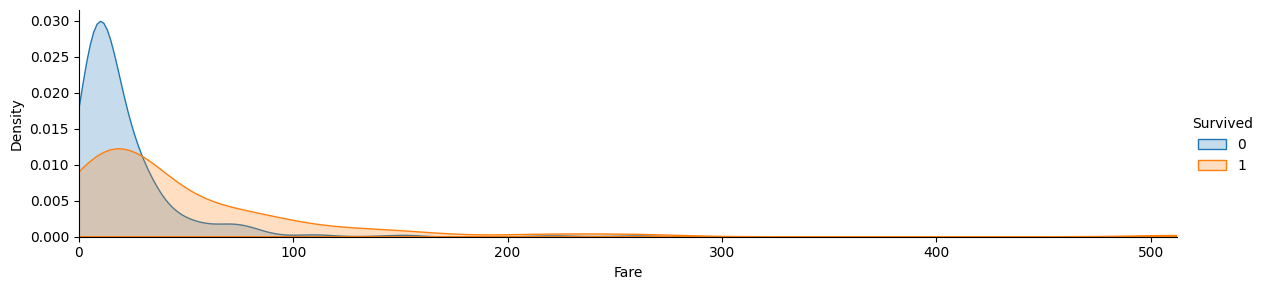

In [26]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)  # 데이터를 survived로 나누겠다
facet.map(sns.kdeplot, 'Fare', shade=True) # FacetGrid의 객체 facet에 'map'함수를 이용해 어떤 그래프를 그릴 것인지 명시 & 변수명 명시 
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

In [27]:
train.loc[train['Fare'] <=17 ,'Fare'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare']<= 30 ),'Fare'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare']<= 100 ),'Fare'] = 2
train.loc[train['Fare'] > 100 , 'Fare'] = 3

test.loc[test['Fare'] <=17 ,'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare']<= 30 ),'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare']<= 100 ),'Fare'] = 2
test.loc[test['Fare'] > 100 , 'Fare'] = 3

In [28]:
# 반복문을 통해 객실번호의 알파벳과 숫자 분리 후, 알파벳만 뽑아오기
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

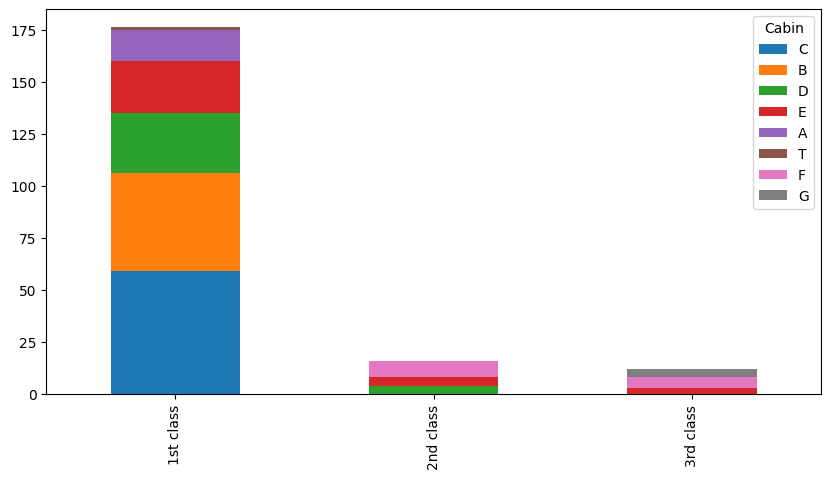

In [29]:
# 클래스별로 객실 종류 count
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

df.plot(kind='bar', stacked=True, figsize=(10,5))

In [30]:
# classifier를 위해 매핑
# feature scaling : raw data 전처리하는 과정 (feature들의 크기, 범위 정규화)/ 소수점 사용
# 숫자의 범위가 비슷하지 않으면 먼 거리에 있는 데이터를 조금 더 중요하게 생각할 수 있음 주의

cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [31]:
# Cabin의 missing field는 1등급 2등급 3등급 클래스와 밀접한 관계
# 각 클래스별 cabin의 중간값을 missing value 처리

train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

train.tail(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
881,882,0,3,0,2.0,0,0,349257,0.0,2.0,0,0
882,883,0,3,1,1.0,0,0,7552,0.0,2.0,0,1
883,884,0,2,0,2.0,0,0,C.A./SOTON 34068,0.0,1.8,0,0
884,885,0,3,0,1.0,0,0,SOTON/OQ 392076,0.0,2.0,0,0
885,886,0,3,1,3.0,0,5,382652,1.0,2.0,2,2
886,887,0,2,0,2.0,0,0,211536,0.0,1.8,0,3
887,888,1,1,1,1.0,0,0,112053,1.0,0.4,0,1
888,889,0,3,1,1.0,1,2,W./C. 6607,1.0,2.0,0,1
889,890,1,1,0,1.0,0,0,111369,1.0,0.8,1,0
890,891,0,3,0,2.0,0,0,370376,0.0,2.0,2,0


In [32]:
# 혼자타면 SibSp, Parch 모두 0으로 표시되므로 +1 해주기
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [33]:
# mapping
# feature scaling 
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [34]:
# 불필요한 데이터 삭제 : drop
# Ticket, SibSp, Parch, PassengerId 정보 제거

features_drop = ['Ticket', 'SibSp', 'Parch']

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [35]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

In [36]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost as xgb 
from xgboost import XGBClassifier

In [38]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = KNeighborsClassifier(n_neighbors=13) # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.5442571785268414


In [39]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
clf = DecisionTreeClassifier() # Knn Model object
scoring = 'accuracy' #평가지표 : 정확도
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score.mean())

0.7474157303370788


In [40]:
# k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
# clf = RandomForestClassifier() # Knn Model object
# scoring = 'accuracy' #평가지표 : 정확도
# score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=-1, scoring=scoring)
# print(score.mean())

0.8080524344569288


In [52]:
listr = []
for r in range(1,300,1):
    clf = RandomForestClassifier(
                              max_depth=3
                              ,n_estimators=r
                             ,min_samples_leaf=8
                             , random_state=44
                             ,n_jobs=-1
                                 )
    clf.fit(train_data, target) # 학습
    pred = clf.predict(test) # 테스트 데이터로 예측값 추출    
    submission1 = pd.read_csv('../답/submission (1).csv')
    del submission1['PassengerId']
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(pred, submission1)
    print(r,accuracy)
    listr.append(accuracy)
print(listr.index(max(listr)),max(listr))

1 0.7488038277511961
2 0.7559808612440191
3 0.7679425837320574
4 0.7535885167464115
5 0.7679425837320574
6 0.7679425837320574
7 0.7703349282296651
8 0.7703349282296651
9 0.7822966507177034
10 0.7894736842105263
11 0.7751196172248804
12 0.777511961722488
13 0.7870813397129187
14 0.784688995215311
15 0.7894736842105263
16 0.7894736842105263
17 0.7942583732057417
18 0.7894736842105263
19 0.784688995215311
20 0.784688995215311
21 0.7918660287081339
22 0.7942583732057417
23 0.7942583732057417
24 0.7990430622009569
25 0.7990430622009569
26 0.7990430622009569
27 0.7990430622009569
28 0.7918660287081339
29 0.7894736842105263
30 0.7894736842105263
31 0.7894736842105263
32 0.7894736842105263
33 0.7894736842105263
34 0.7894736842105263
35 0.7894736842105263
36 0.7894736842105263
37 0.7894736842105263
38 0.7894736842105263
39 0.7894736842105263
40 0.7894736842105263
41 0.7894736842105263
42 0.7894736842105263
43 0.7894736842105263
44 0.7894736842105263
45 0.7894736842105263
46 0.7894736842105263
4

In [42]:
# submission = pd.DataFrame(
#     {
#         "PassengerId":test["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
#         "Survived":prediction
#     }
# )
# submission.to_csv('titanic08.csv', index=False)

In [43]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'n_estimators':[900,1000,1500]
#             #   ,'min_samples_split' : [3.5,7]
#             #   ,'min_samples_leaf' : [3,5,8]}
# }
# grid_rfclf = GridSearchCV(xgb, param_grid=parameters, scoring='accuracy', cv=5)
# grid_rfclf.fit(train_data, target)
# print(grid_rfclf.best_params_)
# print(grid_rfclf.best_score_)

In [44]:
# xgb  = XGBClassifier()
# xgb.fit(train_data, target)

# Y_pred = xgb.predict(test)

# xgb.score(train_data, target)

In [45]:
# clf = RandomForestClassifier(n_estimators=900, max_depth=5)
# clf.fit(train_data, target) # 학습

# prediction = clf.predict(test) # 테스트 데이터로 예측값 추출



In [46]:
# submission = pd.DataFrame(
#     {
#         "PassengerId":test["PassengerId"], # 앞에서 PassendgerId 삭제했으므로 다시 불러 옴
#         "Survived":prediction
#     }
# )
# submission.to_csv('titanic72.csv', index=False)

In [47]:
# xgboost  = XGBClassifier()
# xgboost.fit(train_data, target)
# Y_pred = xgboost.predict(test)
# print(xgboost.score(train_data, target))

# submission = pd.DataFrame({
#         "PassengerId": test["PassengerId"],
#         "Survived": Y_pred
#     })
# submission.to_csv('titanic55.csv', index=False)